# Web APIs Exercises Solutions

## Question-1
Retrieve the advice with the 'id' number equal to 123 using the [Advice Slip API](https://api.adviceslip.com/).

In [71]:
import urllib.request
import json

slip_id = 123
url = f'https://api.adviceslip.com/advice/{slip_id}'

try:
    response = urllib.request.urlopen(url)
    data = json.loads(response.read().decode())
    print(f' ID: {data["slip"]["id"]} --- ADVICE: {data["slip"]["advice"]}')
except :
    print(f'Error')

 ID: 123 --- ADVICE: Winter is coming.


## Question-2
Choose 10 random 'id' numbers between 100 and 200 using the numpy.random.randint() function, and print the corresponding advice messages  if they contain fewer than 30 characters using the [Advice Slip API](https://api.adviceslip.com/)

In [68]:
import urllib.request
import json
import numpy as np

random_slip_id = np.random.randint(100,200,10)

for slip_id in random_slip_id:
    url = f'https://api.adviceslip.com/advice/{slip_id}'
    try:
        response = urllib.request.urlopen(url)
        data = json.loads(response.read().decode())
        if len(data["slip"]["advice"]) < 30:
            print(f' ID: {data["slip"]["id"]} --- ADVICE: {data["slip"]["advice"]}')
    except :
        print(f'Error')

 ID: 123 --- ADVICE: Winter is coming.
 ID: 103 --- ADVICE: Respect your elders.


## Question-3
Find the date of the advice slip containing the word "better" and having an id number closest to 100 using the [Advice Slip API](https://api.adviceslip.com/)

In [149]:
import urllib.request
import json
import math

query = "better"
url = f'https://api.adviceslip.com/advice/search/{query}'


try:
    response = urllib.request.urlopen(url)
    data = json.loads(response.read().decode())
except :
    print(f'Error')

close_ind = math.inf

for slip in data['slips']:
    if abs(int(slip['id']) - 50) < close_ind:
        result_date = slip['date']
        close_ind = abs(int(slip['id']) - 50)

print(f'Result Date: {result_date}')

Result Date: 2017-04-05


## Question-4
Generate random latitude and longitude values for 20 different locations within the following ranges: latitude from -90 to 90 and longitude from -180 to 180. 
- Use the [Open-Meteo API](https://open-meteo.com/en/docs) to retrieve the temperature data for these locations.
- Plot each location as a point on a graph, with the size of the point proportional to the absolute value of the temperature.
- Assign red to the points representing negative temperatures and blue to those with positive temperatures.

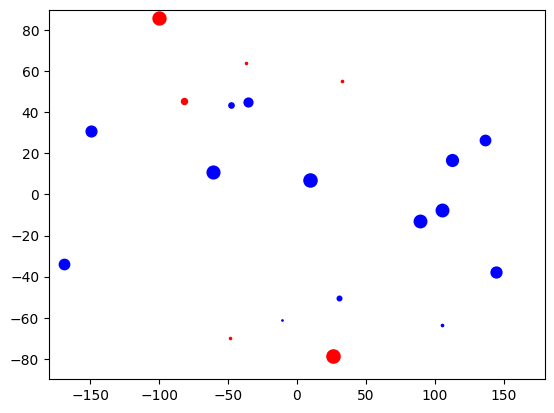

In [115]:
import urllib.request
import json
import numpy as np
import matplotlib.pyplot as plt

N = 20
random_latitude = np.random.uniform(-90, 90, N)
random_longitude = np.random.uniform(-180, 180, N)

for i in range(N):
    latitude, longitude = random_latitude[i], random_longitude[i]
    url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true'
    
    try:
        response = urllib.request.urlopen(url)
        data = json.loads(response.read().decode())
        temp = data["current_weather"]["temperature"]
        if temp < 0: 
            color = 'r'
        else: 
            color = 'b'
        plt.scatter(longitude, latitude, s=abs(temp)*3, c=color)
        plt.xlim(-180,180)
        plt.ylim(-90,90)
            
    except :
        print(f'Error')

## Question-5
Request one week of hourly temperature data for New York using the [Open-Meteo API](https://open-meteo.com/en/docs) and calculate the descriptive statistics of the temperature values, including max, min, mean, median, and standard deviation.

In [168]:
import urllib.request
import json
import numpy as np

latitude, longitude = 40.730610, -73.935242
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m'

try:
    response = urllib.request.urlopen(url)
    data = json.loads(response.read().decode())
    temp = data['hourly']['temperature_2m']
except:
    print('Error')

print(f'Maximum: {max(temp)}')
print(f'Minimum: {min(temp)}')
print(f'Mean   : {np.mean(temp):.02f}')
print(f'Median : {np.median(temp):.02f}')
print(f'Std    : {np.std(temp):.02f}')

Maximum: 5.6
Minimum: -7.0
Mean   : -1.18
Median : -1.40
Std    : 3.32


## Question-6
Request the latitude and longitude values of 10 cities/states using the OpenWeather API, and then plot the locations of these countries on a coordinate system.

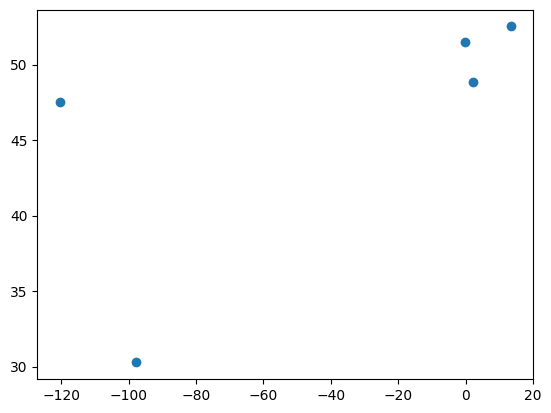

In [179]:
city_list = ["London", "Paris", "Berlin", "Austin", "Washington"]
api_key = "b06a02dc50ebce4f060fb01289ea5e78"
unit = "metric"
lat_list, lon_list = [], []

for city in city_list:
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units={unit}'
    response = urllib.request.urlopen(url)
    data = json.loads(response.read().decode())
    lat_list.append(data['coord']['lat'])
    lon_list.append(data['coord']['lon'])

plt.scatter(lon_list, lat_list);